# Procesamiento de Imágenes Digitales

Visión Computacional 2018-19 <br>
Practica 1. 3
de octubre de 2018

Este enunciado está en el archivo "PracticaPI2018.ipynb" o su versión "pdf" que puedes encontrar en el Aula Virtual.

## Objetivos


Los objetivos de esta práctica son:
* Programar algunas de las rutinas de transformaciones puntuales de procesamiento de imágenes y analizar el resultado de su aplicación.
* Repasar algunos conceptos de filtrado de imágenes y programar algunas rutinas para suavizado y extracción de bordes.
* Implementar un algoritmo de segmentación de imágenes y otro de extracción de líneas mediante la transformada de Hough.

## Requerimientos

Para esta práctica es necesario disponer del siguiente software:
* Python 2.7 ó 3.X 
* Jupyter http://jupyter.org/.
* Los paquetes "pip" y  "PyMaxFlow"
* Las librerías científicas de Python: NumPy, SciPy, y Matplotlib.
* El paquete PyGame.
* La librería OpenCV.

Las versiones preferidas del entorno de trabajo puedes consultarlas en el Aula Virtual en el archivo "ConfiguracionPC2018.txt". 

El material necesario para la práctica se puede descargar del Aula Virtual.

## Condiciones

* La fecha límite de entrega será el martes 23 de octubre a las 23:55.
* La entrega consiste en dos archivos con el código, resultados y respuestas a los ejercicios:
  1. Un "notebook" de Jupyter con los resultados. Las respuestas a los ejercicios debes introducirlas en tantas celdas de código o texto como creas necesarias, insertadas inmediatamente después de  un enuciado y antes del siguiente.
  2. Un documento "pdf" generado a partir del fuente de Jupyter, por ejemplo usando el comando ``jupyter nbconvert --execute --to pdf notebook.ipynb``, o simplemente imprimiendo el "notebook" desde el navegador en la opción del menú "File->Print preview". Asegúrate de que el documento "pdf" contiene todos los resultados correctamente ejecutados.
* Esta práctica puede realizarse en parejas.

## Instala el entorno de trabajo

En la distribución Linux Ubuntu 18.04, éstos son los comandos necesarios para instalar el entorno:
1. Instala los paquetes Python y Jupyter

    ``apt install python
    apt install python-scipy
    apt install python-numpy
    apt install python-matplotlib
    apt install python-opencv
    apt install jupyter
    apt install jupyter-nbconvert``

    Para para trabajar con la versión 3.X de Python, basta sustituir la palabra "python" por "python3" en los comandos anteriores.

2. Instala el paquete PyMaxflow

   ``pip install PyMaxflow`` o ``pip3 install PyMaxflow``
   
   Si no tienes el paquete "pip" debes instalarlo: ``apt install python-pip`` o ``apt install python3-pip``
3. Instala el paquete "pygame"

    ``apt install python-pygame`` 
    
    Si deseas trabajar en Python 3.X, la versión 18.04 de Ubuntu no tiene el paquete "python3-pygame" pero puedes instalarlo con la herramienta pip: ``pip3 install pygame``

## Transformaciones puntuales

En este apartado te recomiendo que uses al menos la imagen indicada, que puedes encontrar en el directorio de imágenes
del aula virtual. También puedes probar con otras que te parezcan interesantes.

**Ejercicio 1.** Carga la imagen ``escilum.tif``. Calcula
y muestra su histograma, por ejemplo,  con la función ``hist()`` de
``matplotlib.pyplot``. A la vista del histograma, discute
qué problema tiene la imagen para analizar visualmente la
región inferior izquierda.

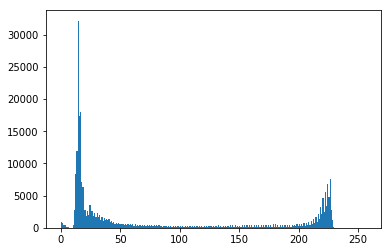

In [34]:
from imageio import imread
import numpy as np
from matplotlib.pyplot import hist, show

imgName='images/escilum.tif'

img = imread(imgName)

npimg = np.array(img)

bins = list(range(0,256+1))

histogram = hist(npimg.flatten(), bins=bins)

show() # We need to run this cell twice to show the plot. Why?

El problema que tiene es ... **TODO**

**Ejercicio 2.** Escribe una función ``eq_hist(histograma)``
que calcule la función de transformación puntual que ecualiza el histograma.
Aplica la función de transformación a la imagen anterior.
Calcula y muestra nuevamente el histograma y la imagen
resultantes, así como la función de transformación.

Discute los resultados obtenidos. ¿Cuál sería el resultado si volviésemos a ecualizar la imagen resultante?

En este ejercicio tienes que implementar la función que ecualiza el histograma. No puedes usar funciones que lo hagan por ti.

In [35]:
def eq_hist(histogram):

    values, _, _ = histogram

    cs = np.cumsum(values)

    f = [int(round(255*cs[i]/cs[255])) for i in range(256)]
    
    def lambd(j):
        return f[int(j)]
    
    return lambd

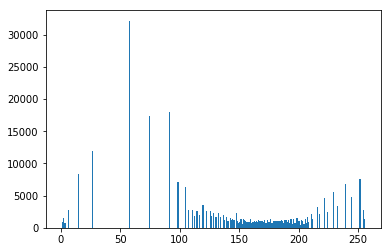

In [41]:
func = eq_hist(histogram)
eq_img = np.vectorize(func2)

imgeq = eq_img(npimg)

new_histogram = hist(imgeq.flatten(), bins=bins)

show()

<function matplotlib.pyplot.show>

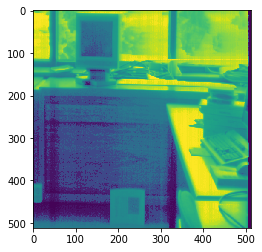

In [45]:
from matplotlib import pyplot as plt
plt.imshow(imgeq)
plt.show

Discusion: **TODO**

Resultado si se vuelve a equalizar: **TODO** (en teoría el mismo, pero tal vez al discretizar pueda haber variaciones mínimas)

##  Filtrado

Para realizar las convoluciones utiliza la función ``convolve`` o ``convolve1d`` de ``scipy.ndimage.filters``,
segun corresponda.


Carga y muestra las imágenes ``escgaus.bmp`` y ``escimp5.bmp`` que están contaminadas respectivamente
con ruido de tipo gaussiano e impulsional. En los siguientes ejercicios también puedes utilizar otras imágenes que te parezcan interesantes.

**Ejercicio 3.** Escribe una función ``masc_gaus(sigma, n)``
que construya una máscara de una dimensión de un filtro
gaussiano de tamaño *n* y varianza σ . Filtra las imágenes
anteriores con filtros bidimensionales de diferentes tamaños
de *n* , y/o σ.

En este ejercicio tienes que implementar la función que construye la máscara. No puedes usar funciones que construyan la máscara o realicen el filtrado automáticamente.

Muestra y discute los resultados. Pinta alguna de las máscaras construidas.



**Ejercicio 4.** Escribe una función ``masc_deriv_gaus(sigma, n)`` que construya una máscara de una dimensión de un
filtro derivada del gaussiano de tamaño *n* y varianza σ. Filtra la imagen ``corridor.jpg`` con filtros bidimensionales de derivada
del gaussiano para extraer los bordes de la imagen. Prueba con diferentes valores de *n* y/o σ.

Muestra y discute los resultados. Pinta alguna de las máscaras construidas.

**Ejercicio 5.** Compara los tiempos de ejecución de las convoluciones anteriores cuando se realizan con ``convolve1d`` en vez de con ``convolve``.
Analiza los tiempos para diferentes valores de *n* y justifica los resultados.

In [ ]:
# Posible ejemplo de código
import time

start_time = time.clock()
# ejecuta convoluciones ....

print time.clock() - start_time, "seconds"

**Ejercicio 6.** Aplica el filtro de la mediana a las imágenes
``escgaus.bmp`` y ``escimp5.bmp`` con diferentes valores de tamaño de la ventana. Muestra y discute los resultados. Compáralos con los obtenidos en el Ejercicio 3.

Para realizar este ejercicio puedes utilizar la función ``cv2.medianBlur()`` de OpenCV, ``scipy.ndimage.median_filter()`` de SciPy o hacer tu propia función. Para ello puedes escribir una función ``mediana(img, n)`` y aplicarla a la imagen con la función ``scipy.ndimage.filters()``.



**Ejercicio 7.** Utiliza la funcion ``cv2.bilateralFilter()`` de OpenCV para realizar el filtrado bilateral de una
imagen. Selecciona los parámetros adecuados y aplícalo a las imágenes ``escgaus.bmp`` y ``escimp5.bmp`` y otras que elijas tú.

Si llamamos $\sigma_r$ a la varianza de de la gaussiana que controla la ponderación debida a la diferencia entre los valores de los píxeles y $\sigma_s$ a la varianza de la gaussiana que controla la ponderación debida a la posición de los píxeles. Responde a la siguientes preguntas:
* ¿Cómo se comporta el filtro bilateral cuando la varianza $\sigma_r$ es muy alta? ¿En este caso qué ocurre si $\sigma_s$ es alta o baja?
* ¿Cómo se comporta si $\sigma_r$ es muy baja? ¿En este caso cómo se comporta el filtro dependiendo si $\sigma_s$ es alta o baja?

Muestra y discute los resultados para distintos valores de los parámetros y varias aplicaciones sucesivas del filtro. Compáralos con los obtenidos en los Ejercicios 3 y 6.

## Transformada Hough

**Ejercicio 8.** Emplea la transformada Hough para encontrar segmentos rectilíneos en la imagen ``corridor.jpg``. Para extraer los bordes de la imagen utiliza las funciones escritas en los ejercicios 3 y 4. Utiliza la función ``cv2.HoughLinesP()`` de OpenCV.

Discute el funcionamiento para distintos valores de los parámetros de la función, así como de
los filtros utilizados para extraer los bordes de la imagen. Pinta los resultados sobre la imagen (mira como ejemplo, https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_houghlines/py_houghlines.html).

## Segmentación

**Ejercicio 9.** Escribe una función que segmente el objeto central de una imagen a partir de una segmentación manual
inicial realizada por el usuario. Puedes utilizar el código proporcionado en el archivo segm.py. En la optimización
1. toma como afinidad entre una pareja de píxeles la
diferencia en sus valores de color y;
2. sólo establece los términos unitarios de los píxeles
marcados por el usuario.

Aplícalo, al menos, a las imágenes ``persona.png`` y ``horse.jpg``. Muestra y discute los resultados.

**Ejercicio 10.** Mejora el algoritmo anterior. Puedes utilizar algunas de las que te sugiero a continuación u otras que creas más convenientes:
* Refina la segmentación iterativamente.
* Mejora la función de afinidad entre píxeles.
* Mejora los términos unitarios

mejora los resultados de algunas de las imágenes anteriores. Muestra y discute los resultados.